## Information Retrieval and NLP

Information Retrieval(IR) is not only an important part of text Data Mining but it also has an extensive application in Natural Language Processing(NLP). This is because every NLP pipiline implements text normalization as an important preprocessing step.

A few important definitions before we get started:

- A **word** is a string of characters that appears in a text/sentence/paragraph, etc. (We all know this one!)
- A **term** is a normalized word i.e. a word that has gone through preprocessing. For example: "studying"(A word) becomes "study"(A term after a certain kind of normalization).
- A **token** can be thought of a unique instance of a word or a term. For example, the set {'hannah','is','the','queen','of','the','Kingdom'} has 7 words but 6 tokens(because 'the' is repeated).
- Two words are of the same **type** if they fall under the same equivalence class or become the same term after normalization. For example, Studies, Study and Studying could be of the same type after performing some kind of normalization.


### Why perform normalization?
Because we want to retreieve all documents relevant to the user's query. For example, ff the user searches for "U.S.A" not only do we want all documents with that specific query, we may also want documents with "USA" and "United States of America" and "North America" and maybe even "the States"!

This notebook will walk you through some commonly used methods for text normalization and IR. We will be using te 'Disaster Tweets" dataset from Kaggle which can be found at: https://www.kaggle.com/datasets/vstepanenko/disaster-tweets

Enjoy!

In [1]:
# let's import necessary libraries

# nltk stands for Natural Language Tookit. this library is commonly used for text normalization
import nltk

# for arrays and dataframes
import numpy as np     
import pandas as pd    

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# let's import the disaster tweets dataset from Kaggle

df_train = pd.read_csv('Data\\disaster_tweets_kaggle\\train.csv', index_col = False)
df_test = pd.read_csv('Data\\disaster_tweets_kaggle\\test.csv', index_col = False)

df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
# drop the 'id' column
df_train.drop(['id'], axis = 1, inplace = True)
df_test.drop(['id'], axis = 1, inplace = True)

In [5]:
df_train.isnull().sum()

keyword       61
location    2533
text           0
target         0
dtype: int64

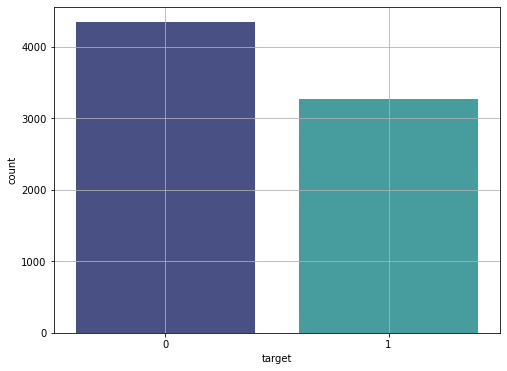

In [6]:
# let's look at distribution of the target variable
plt.figure(figsize = (8,6))
sns.countplot(data = df_train, x = 'target', palette = "mako")
plt.grid()

<AxesSubplot:>

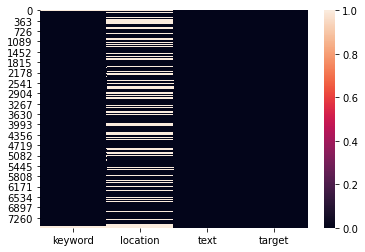

In [7]:
# let's visualize the missing values
plt.figure(figsize = (6,4))
sns.heatmap(df_train.isnull(), cmap = "rocket")

keyword       26
location    1105
text           0
dtype: int64


<AxesSubplot:>

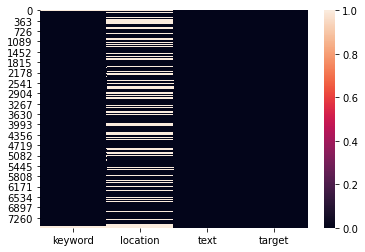

In [8]:
# let's check the test data
print(df_test.isnull().sum())
plt.figure(figsize = (6,4))
sns.heatmap(df_train.isnull(), cmap = "rocket")

In [9]:
# since there are too many missing valus for column 'location' we will drop this
df_train.drop(labels = ['location'], axis = 1, inplace = True)
df_test.drop(labels = ['location'], axis = 1, inplace = True)

In [10]:
# to deal with missing values in 'keyword' let's look at the mst common keywords
df_train.groupby('keyword').count().sort_values(by = 'target', ascending = False).head(20)

,text,target
keyword,,
fatalities,45,45
deluge,42,42
armageddon,42,42
sinking,41,41
damage,41,41
harm,41,41
body%20bags,41,41
outbreak,40,40
evacuate,40,40


In [11]:
# save keywords as a list but we only want keywords that are not null
keywords_list = list((df_train[df_train['keyword'].isnull() == False]['keyword']).unique())

In [12]:
# check length to confirm only unique words are present
len(keywords_list)

221

In [13]:
'''
We can see that most keywords above are related to disaster although the tweet may not be about disaster.
'''
df_train[df_train['keyword'].isnull()]['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 61, dtype: object

In [14]:
# we will fill null values for 'keyword' based on the list of present keywords that was just created

def impute_keyword(df):
    keyword = df[0]
    text = df[1]
    
    if pd.isnull(keyword):            # if keyword === null
        for item in keywords_list:
            if item in text:          # of the tweet contains any keyword from the keyword list
                return item
    return keyword


In [15]:
df_train['keyword'] = df_train[['keyword', 'text']].apply(impute_keyword, axis = 1)
df_test['keyword'] = df_test[['keyword', 'text']].apply(impute_keyword, axis = 1)

In [16]:
# let's check if any null values were replaced
print("Train:", df_train['keyword'].isnull().sum())  
print("Test:", df_test['keyword'].isnull().sum())  

Train: 30
Test: 14


We cal see that more than half of the null values were replaced. However, this does not necessarily mean the remaining tweets did not contain any keywords. Let's look at the remaining tweets with null values.

In [17]:
df_train[df_train['keyword'].isnull()]['text']

10            Three people died from the heat wave so far
13                #Flood in Bago Myanmar #We arrived Bago
15                                         What's up man?
16                                          I love fruits
17                                       Summer is lovely
18                                      My car is so fast
19                           What a goooooooaaaaaal!!!!!!
20                                 this is ridiculous....
21                                      London is cool ;)
22                                            Love skiing
23                                  What a wonderful day!
24                                               LOOOOOOL
25                         No way...I can't eat that shit
26                                  Was in NYC last week!
27                                     Love my girlfriend
28                                              Cooool :)
29                                     Do you like pasta?
30            

13 contains '#Flood', 2587 contains 'Sirens' and 7599 contains '#Earthquake'. However, these were useful during imputation. Why?
Let's double check with our keyword list.

In [18]:
def check_keyword(value):
    if value in keywords_list:
        print(f"'{value}' is in the keyword list.")
    else:
        print(f"'{value}' is not the keyword list.")
        
check_keyword("#Flood")
check_keyword("flood")
check_keyword("#Earthquake")
check_keyword("earthquake")
check_keyword("Sirens")
check_keyword("sirens")

'#Flood' is not the keyword list.
'flood' is in the keyword list.
'#Earthquake' is not the keyword list.
'earthquake' is in the keyword list.
'Sirens' is not the keyword list.
'sirens' is in the keyword list.


As you can see, although #Flood, Sirens and #Earthquake are not present in the keywords list, flood, sirens and eathquake are! We just need to do some normalzation to deal with these.

## Common techniques for text data normalization

#### 1. Tokelization
This is the process of converting a text/sentence or a string od characters into a list of words/tokens. We will also use delimiters to remove "#", quolations, etc.

#### 2. Case Folding
Reducing all letters to upper/lower case.

#### 3. Removing Stop Words
Stop words are common words like 'the','in','on','at', etc. which generally have little value when it comes to IR. However, these are found to be useful in finding patterns or meaning during deep learning.

#### 4. Lemmatization
Reducing a word/token into it's dictionary headword form i.e. lemma. For example: cars, car's -> car; cutting -> cut; etc.

#### 5. Stemming
Cutting off words at the end to acheive "principled" lemmatization. It si a faster way of acheiving lemmatization and does not depend on context. However, it may not always give sensible results in some cases. Exampe: reduction -> reduc (stemming) but reduction -> reduce (lemmatization)

**To replace the remaining null values in the 'Keyword' column we will only use tokenization, case folding and stop word removal for now.**

In [19]:
import string     # to remove punctions
from nltk.corpus import stopwords     # to remove stopwords

def normalize(text, stopword_removal = 1, tokenize = 1):
    
    # first create a list of characters without punctuation
    char_list = [ch for ch in text if ch not in string.punctuation]
    
    # join to re create a text without punctuation
    text = ''.join(char_list)
    
    # case folding
    lower_cased_text = text.casefold()
    
    if stopword_removal == tokenize == 1:
        # tokenize and remove stopwords
        word_list = [word for word in lower_cased_text.split() if word not in stopwords.words('english')]
    elif stopword_removal == 0 and tokenize == 1:
        word_list = [word for word in lower_cased_text.split()]
    elif stopword_removal == 1 and tokenize == 0:
        word_list = [word for word in lower_cased_text.split() if word not in stopwords.words('english')]
        word_list = ' '.join(word_list)
    else: # don't remove sopwords + don't tokenize
        return lower_cased_text
    
    return word_list


In [20]:
#let's test it
normalize(df_train['text'][1])

['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada']

In [21]:
# now let's use this to replace the remaining null values if possible

# this function uses normalization to find keywords from the tweet
def smart_impute_keyword(df):
    keyword = df[0]
    text = df[1]
    
    if pd.isnull(keyword):            # if keyword === null
        normalized_text_list = normalize(text)
        for item in normalized_text_list:
            if item in keywords_list:         
                return item
        return "none"
    return keyword

In [22]:
df_train['keyword'] = df_train[['keyword', 'text']].apply(smart_impute_keyword, axis = 1)
df_test['keyword'] = df_test[['keyword', 'text']].apply(smart_impute_keyword, axis = 1)

In [23]:
# let's check if any null values were replaced
print("Train:", df_train['keyword'].isnull().sum())  
print("Test:", df_test['keyword'].isnull().sum())

Train: 0
Test: 0


### Feature Engineering

In [24]:
# Add length of the tweet as new attribute

df_train['length'] = df_train['text'].apply(lambda x: len(x))
df_train.head()

,keyword,text,target,length
0,earthquake,Our Deeds are the Reason of this #earthquake M...,1,69
1,fire,Forest fire near La Ronge Sask. Canada,1,38
2,evacuation,All residents asked to 'shelter in place' are ...,1,133
3,evacuation,"13,000 people receive #wildfires evacuation or...",1,65
4,fire,Just got sent this photo from Ruby #Alaska as ...,1,88


In [25]:
# repeat with text data

df_test['length'] = df_test['text'].apply(lambda x: len(x))

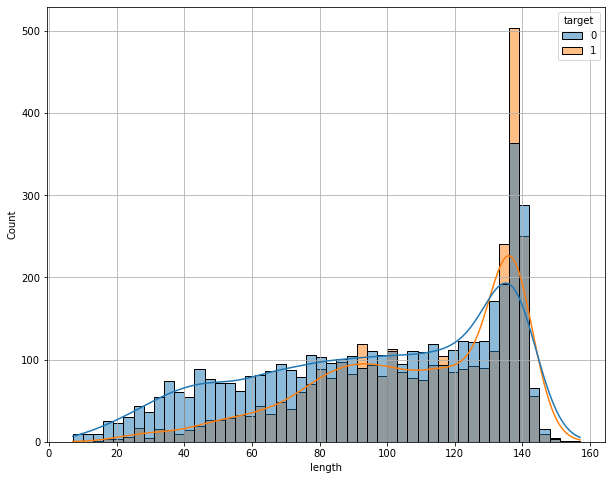

In [26]:
# check target variable distribution with respect to length
plt.figure(figsize = (10,8))
sns.histplot(df_train, x = 'length', hue = 'target', bins = 50, kde = True)
plt.grid()

In [27]:
# let's look at the distribution's moments
print(df_train[df_train['target'] == 1]['length'].describe())
print("\n")
print(df_train[df_train['target'] == 0]['length'].describe())

count    3271.000000
mean      108.113421
std        29.309854
min        14.000000
25%        88.000000
50%       115.000000
75%       136.000000
max       151.000000
Name: length, dtype: float64


count    4342.000000
mean       95.706817
std        35.885924
min         7.000000
25%        68.000000
50%       101.000000
75%       130.000000
max       157.000000
Name: length, dtype: float64


### Sentiment Analysis

The sentiment behind a tweet can play a huge role classifying whether it is actually about a disaster or not. Here we will use the nltk.vader_lexicon package to extract sentiment from a tweet and sue it as a new attribute.

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [33]:
# let's look at an example
sia.polarity_scores("The weather is great!")

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}

In [34]:
def get_sentiment_scores(text):
    res = sia.polarity_scores(text)
    return res['neg'], res['neu'], res['pos']

In [35]:
# to get a better sentiment analysis first we will remove punctuations and use case folding on the texts
df_train['normalized_text'] = df_train['text'].apply(normalize, stopword_removal = 0, tokenize = 0)
df_test['normalized_text'] = df_test['text'].apply(normalize, stopword_removal = 0, tokenize = 0)

In [36]:
df_train.head()

,keyword,text,target,length,normalized_text
0,earthquake,Our Deeds are the Reason of this #earthquake M...,1,69,our deeds are the reason of this earthquake ma...
1,fire,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask canada
2,evacuation,All residents asked to 'shelter in place' are ...,1,133,all residents asked to shelter in place are be...
3,evacuation,"13,000 people receive #wildfires evacuation or...",1,65,13000 people receive wildfires evacuation orde...
4,fire,Just got sent this photo from Ruby #Alaska as ...,1,88,just got sent this photo from ruby alaska as s...


In [37]:
df_train['neg'], df_train['neu'], df_train['pos'], = zip(*df_train['normalized_text'].apply(get_sentiment_scores))
df_test['neg'], df_test['neu'], df_test['pos'], = zip(*df_test['normalized_text'].apply(get_sentiment_scores))

In [38]:
df_train.head()

,keyword,text,target,length,normalized_text,neg,neu,pos
0,earthquake,Our Deeds are the Reason of this #earthquake M...,1,69,our deeds are the reason of this earthquake ma...,0.000,0.851,0.149
1,fire,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask canada,0.286,0.714,0.000
2,evacuation,All residents asked to 'shelter in place' are ...,1,133,all residents asked to shelter in place are be...,0.095,0.905,0.000
3,evacuation,"13,000 people receive #wildfires evacuation or...",1,65,13000 people receive wildfires evacuation orde...,0.000,1.000,0.000
4,fire,Just got sent this photo from Ruby #Alaska as ...,1,88,just got sent this photo from ruby alaska as s...,0.000,1.000,0.000


In [39]:
# drop original text
df_train.drop(['text'], axis = 1, inplace = True)
df_test.drop(['text'], axis = 1, inplace = True)

In [40]:
df_train.head(10)

,keyword,target,length,normalized_text,neg,neu,pos
0,earthquake,1,69,our deeds are the reason of this earthquake ma...,0.000,0.851,0.149
1,fire,1,38,forest fire near la ronge sask canada,0.286,0.714,0.000
2,evacuation,1,133,all residents asked to shelter in place are be...,0.095,0.905,0.000
3,evacuation,1,65,13000 people receive wildfires evacuation orde...,0.000,1.000,0.000
4,fire,1,88,just got sent this photo from ruby alaska as s...,0.000,1.000,0.000
5,fire,1,110,rockyfire update california hwy 20 closed in ...,0.138,0.862,0.000
6,disaster,1,95,flood disaster heavy rain causes flash floodin...,0.240,0.760,0.000
7,fire,1,59,im on top of the hill and i can see a fire in ...,0.158,0.724,0.118
8,emergency,1,79,theres an emergency evacuation happening now i...,0.191,0.809,0.000
9,tornado,1,52,im afraid that the tornado is coming to our area,0.000,1.000,0.000


Text(0.5, 1.0, 'Traget distribution on Negative sentiment')

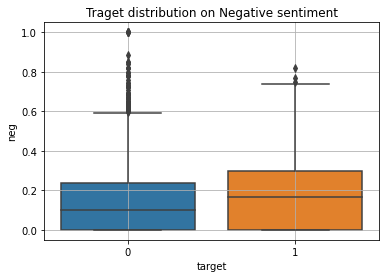

In [41]:
# let's checkout the distribution based plt.figure(figsize = (8,6))
plt.figure(figsize = (6,4))
sns.boxplot(data = df_train, x = 'target', y = 'neg')
plt.grid(which = 'both')
plt.title('Traget distribution on Negative sentiment')

Text(0.5, 1.0, 'Traget distribution on Positive sentiment')

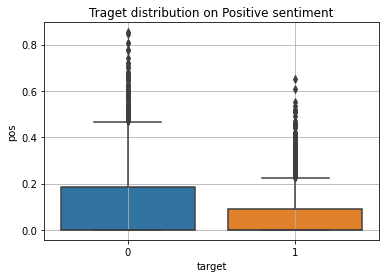

In [42]:
plt.figure(figsize = (6,4))
sns.boxplot(data = df_train, x = 'target', y = 'pos')
plt.grid(which = 'both')
plt.title('Traget distribution on Positive sentiment')

Text(0.5, 1.0, 'Traget distribution on Neutral sentiment')

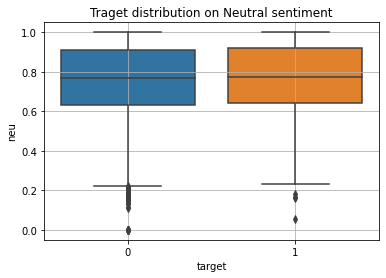

In [43]:
plt.figure(figsize = (6,4))
sns.boxplot(data = df_train, x = 'target', y = 'neu')
plt.grid(which = 'both')
plt.title('Traget distribution on Neutral sentiment')

In [44]:
# let's check how many values have 0 for positive and negative sentiment
df_train[(df_train['neg'] == 0) & (df_train['pos'] == 0)]['normalized_text'].count()

1817

### Correlation Heatmap 

<AxesSubplot:>

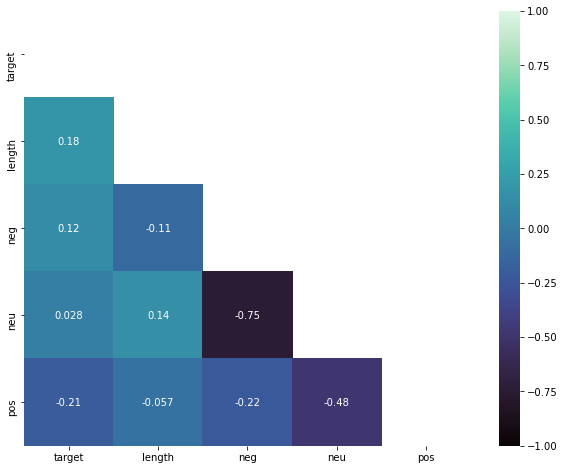

In [45]:
# let's check correlation between numerical features and the target variable

plt.figure(figsize = (10, 8))
sns.heatmap(data = df_train.corr(), mask = np.triu(np.ones_like(df_train.corr(), dtype= bool)), \
            annot = True, vmax = 1, vmin = -1, cbar = True, cmap = "mako")

In [46]:
# let's check out the percentage non-diasater tweets have more positive tone than negative
total_nd =  df_train[df_train['target'] == 0]['normalized_text'].count()
total_more_pos = df_train[(df_train['target'] == 0) & (df_train['pos'] >= df_train['neg'])]['normalized_text'].count()
print(f"The % of non-disaster tweets that are more positive than negative are: {total_more_pos*100/total_nd:.2f}%.")

The % of non-disaster tweets that are more positive than negative are: 56.66%.


In [47]:
# let's check out the percentage diasater tweets have more negative tone than positive
total_d =  df_train[df_train['target'] == 1]['normalized_text'].count()
total_more_neg = df_train[(df_train['target'] == 1) & (df_train['pos'] <= df_train['neg'])]['normalized_text'].count()
print(f"The % of disaster tweets that are more negative than positive are: {total_more_neg*100/total_d:.2f}%.")

The % of disaster tweets that are more negative than positive are: 83.12%.


### Count Vectorization of Text String

#### Bag of words model



The bag of words model first uses the entire text dataset to create a vocabulary of tokens. Then for each text data point, a count vector is created that contains the number of times each token is present in the dataset. This will be a very sparse matrix for most text dataset.

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
df_train.head()

,keyword,target,length,normalized_text,neg,neu,pos
0,earthquake,1,69,our deeds are the reason of this earthquake ma...,0.000,0.851,0.149
1,fire,1,38,forest fire near la ronge sask canada,0.286,0.714,0.000
2,evacuation,1,133,all residents asked to shelter in place are be...,0.095,0.905,0.000
3,evacuation,1,65,13000 people receive wildfires evacuation orde...,0.000,1.000,0.000
4,fire,1,88,just got sent this photo from ruby alaska as s...,0.000,1.000,0.000


In [50]:
'''
As our model needs to be able to transform both training and text data the bag of words vocabulary must include tokens
from both training and test tweets.
'''
complete_vocab = df_train['normalized_text'].append(df_test['normalized_text'], ignore_index = True)

In [51]:
complete_vocab

0        our deeds are the reason of this earthquake ma...
1                    forest fire near la ronge sask canada
2        all residents asked to shelter in place are be...
3        13000 people receive wildfires evacuation orde...
4        just got sent this photo from ruby alaska as s...
                               ...                        
10871    earthquake safety los angeles ûò safety faste...
10872    storm in ri worse than last hurricane my citya...
10873    green line derailment in chicago httptcoutbxlc...
10874    meg issues hazardous weather outlook hwo httpt...
10875    cityofcalgary has activated its municipal emer...
Name: normalized_text, Length: 10876, dtype: object

In [52]:
# create a bag of words transformer using the normalize function as he analyzer
bow_transformer = CountVectorizer(analyzer = normalize).fit(complete_vocab)

In [53]:
# check how large the vocabulary is
print(len(bow_transformer.vocabulary_))

29227


In [54]:
tweet2 = df_train['normalized_text'][2]
print(tweet2)

all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected


In [55]:
# each term is converted into it's vocabulary id and the count
print(bow_transformer.transform([tweet2]))

  (0, 2052)	1
  (0, 7193)	1
  (0, 7303)	1
  (0, 20640)	1
  (0, 20857)	1
  (0, 21098)	1
  (0, 21861)	2
  (0, 23234)	1
  (0, 24459)	2


In [56]:
# create the sparse matrix
tweets_bow = bow_transformer.transform(df_train['normalized_text'])

In [57]:
tweets_bow.shape

(7613, 29227)

In [58]:
#to get non zero occurence
tweets_bow.nnz

74592

In [59]:
def get_sparsity(matrx):
    total_elements = (matrx.shape[0] * matrx.shape[1])
    total_nonzero = matrx.nnz
    total_zero = total_elements - total_nonzero
    sparsity = total_zero/total_elements
    return 100*sparsity

In [60]:
# check sparsity
print(f'sparsity: {get_sparsity(tweets_bow):.3f}%')

sparsity: 99.966%


### Tf-idf weighing

**Tf** also known as **term frequency** is the number of times a term occurs in a specific text data point.
**df** also known as **document frequency** is the number of documents the term occurs in. The lower the **df**, the rarer the term
**idf** also known as the **inverse document frequency** quantifies a term's rarity using its **df** value. Lower **df** corresponds to higher **idf**.

### Tf-idf weight = Tf x idf is an attibute of a single datapoint with regards to a single term
1. We will now convert the count matrix into a tf-idf weight matrix. 
2. This whole process has converted out text data into numerical data existing in  avector space where each token in the bag of words vocabulary is a dimension. 
3. After that, any new data text data can be converted to a tf-idf vector and has it's own position in the vector space.
4. Depending on where the new data lies, we can classify it as "disaster" or "non-disaster" tweet.

In [61]:
from sklearn.feature_extraction.text import TfidfTransformer

In [62]:
#creating tfidf transformer
tfidf_transformer = TfidfTransformer().fit(tweets_bow)

In [63]:
#let's see the tf-idf for third_BOW

tfidf_third = tfidf_transformer.transform(tweets_bow[3])

In [64]:
print(tfidf_third)

  (0, 28426)	0.4019704021353919
  (0, 22911)	0.4767404904047081
  (0, 21596)	0.2524302255967596
  (0, 21098)	0.4019704021353919
  (0, 7193)	0.32499857070155524
  (0, 3707)	0.2800754357680283
  (0, 171)	0.44918899914108007


In [65]:
#converting sparse matrix data to tfidf values

tweets_tfidf = tfidf_transformer.transform(tweets_bow)

In [66]:
print(tweets_tfidf.shape)

(7613, 29227)


In [67]:
# repeat for test data
tweets_bow_test = bow_transformer.transform(df_test['normalized_text'])
tweets_tfidf_test = tfidf_transformer.transform(tweets_bow_test)
print(tweets_tfidf_test.shape)

(3263, 29227)


In [68]:
df_train['target'].shape

(7613,)

In [69]:
type(tweets_tfidf)

scipy.sparse.csr.csr_matrix

## K Nearest Neighbor Classification

We will first use KNN classifier to create a model by just using the tf-idf vector and the class label. We will use other attributes later to compare the performance difference.

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn_model = KNeighborsClassifier()

In [94]:
# using grid search CV for cross validation
from sklearn.model_selection import RandomizedSearchCV

# since out matrix is sparse we need to use larger k
random_grid = {
    'n_neighbors': [ n for n in range(5,550,5)],
    'p': [1, 2]
}

In [95]:
knn_cv = RandomizedSearchCV(estimator = knn_model, param_distributions = random_grid, n_iter = 30,
                               cv = 30, verbose = 1)
knn_cv.fit(tweets_tfidf, df_train['target'])

Fitting 30 folds for each of 30 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  1.8min finished


RandomizedSearchCV(cv=30, estimator=KNeighborsClassifier(), n_iter=30,
                   param_distributions={'n_neighbors': [5, 10, 15, 20, 25, 30,
                                                        35, 40, 45, 50, 55, 60,
                                                        65, 70, 75, 80, 85, 90,
                                                        95, 100, 105, 110, 115,
                                                        120, 125, 130, 135, 140,
                                                        145, 150, ...],
                                        'p': [1, 2]},
                   verbose=1)

In [96]:
# save best parameters
params = knn_cv.best_params_

In [97]:
params

{'p': 2, 'n_neighbors': 430}

In [98]:
knn_cv.best_score_

0.6734840704200514

In [257]:
# initialize final model but this will be trained using a pipeline
knn_final = KNeighborsClassifier(**params)

In [ ]:
'''
Next: create pipeline to transform and predict test data
'''